In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LogisticRegression

In [71]:
data = pd.read_csv(r"C:\Users\Lin\Desktop\ALY6020\Churn_Modelling.csv")

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [73]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [74]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [75]:
# Summary statistics for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Summary of categorical columns:\n", data[categorical_columns].describe())

Summary of categorical columns:
        Geography Gender
count      10000  10000
unique         3      2
top       France   Male
freq        5014   5457


In [76]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

In [77]:
print("Descriptive statistics for numerical columns:\n", data.describe())

Descriptive statistics for numerical columns:
         CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584 

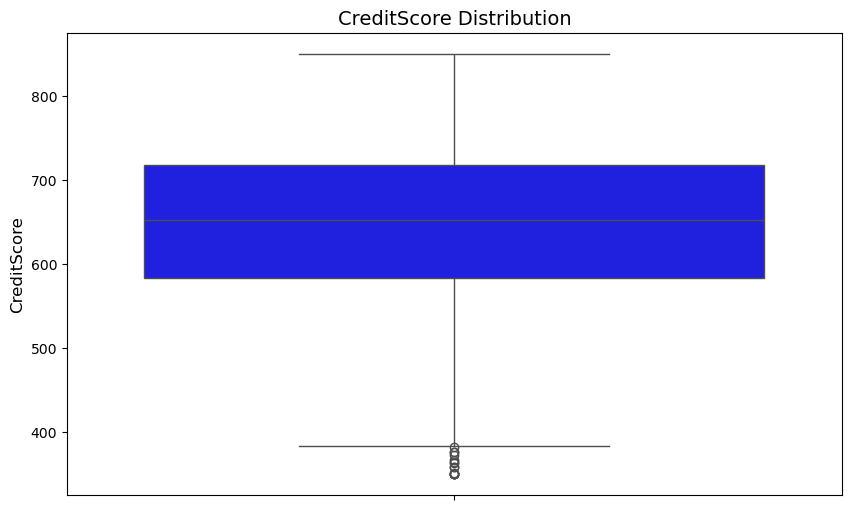

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['CreditScore'], color="blue")  # Use 'y' instead of 'x'
plt.title('CreditScore Distribution', fontsize=14)
plt.ylabel('CreditScore', fontsize=12)  # Adjust ylabel instead of xlabel
plt.show()

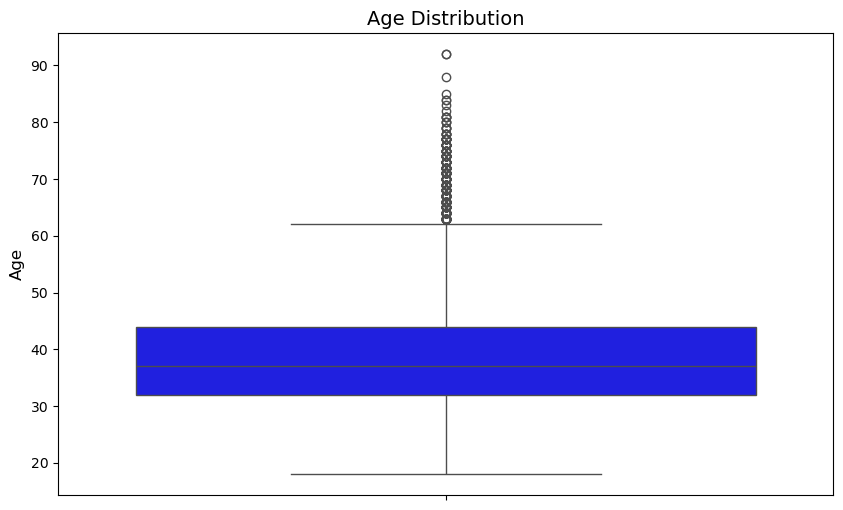

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Age'], color="blue")  # Use 'y' instead of 'x'
plt.title('Age Distribution', fontsize=14)
plt.ylabel('Age', fontsize=12)  # Adjust ylabel instead of xlabel
plt.show()

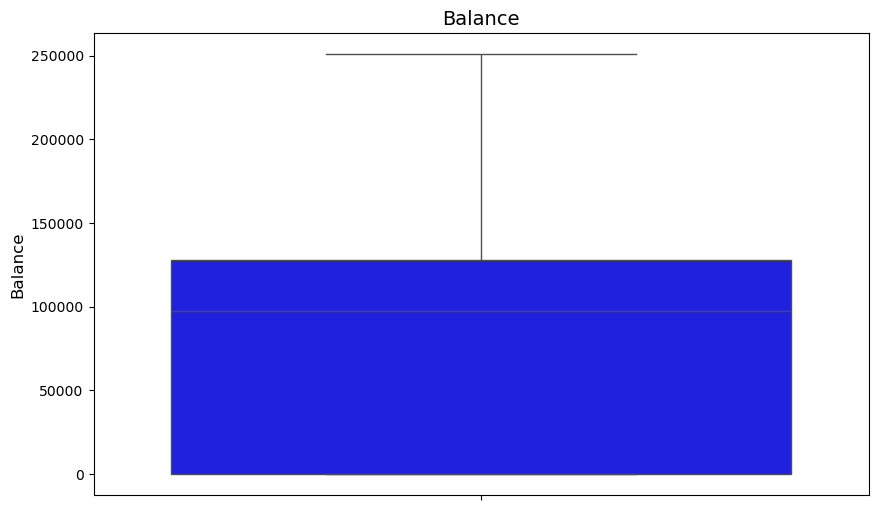

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Balance'], color="blue")  # Use 'y' instead of 'x'
plt.title('Balance', fontsize=14)
plt.ylabel('Balance', fontsize=12)  # Adjust ylabel instead of xlabel
plt.show()

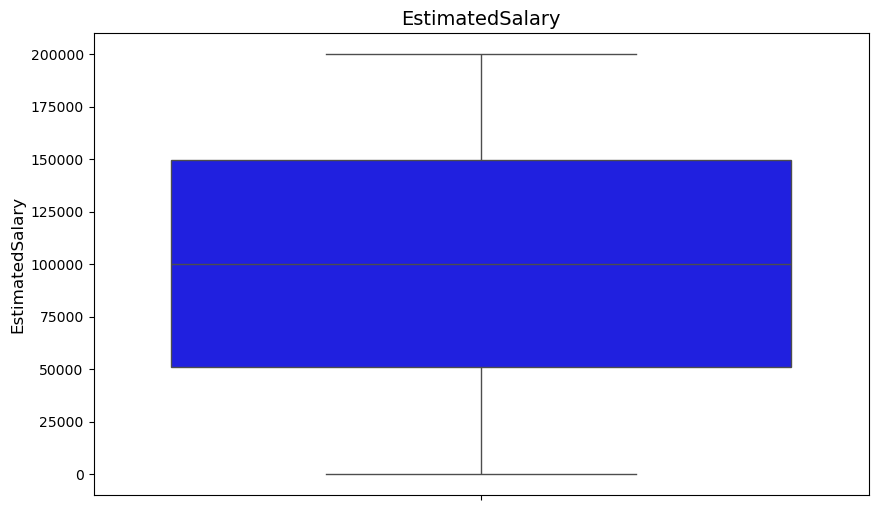

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['EstimatedSalary'], color="blue")  # Use 'y' instead of 'x'
plt.title('EstimatedSalary', fontsize=14)
plt.ylabel('EstimatedSalary', fontsize=12)  # Adjust ylabel instead of xlabel
plt.show()

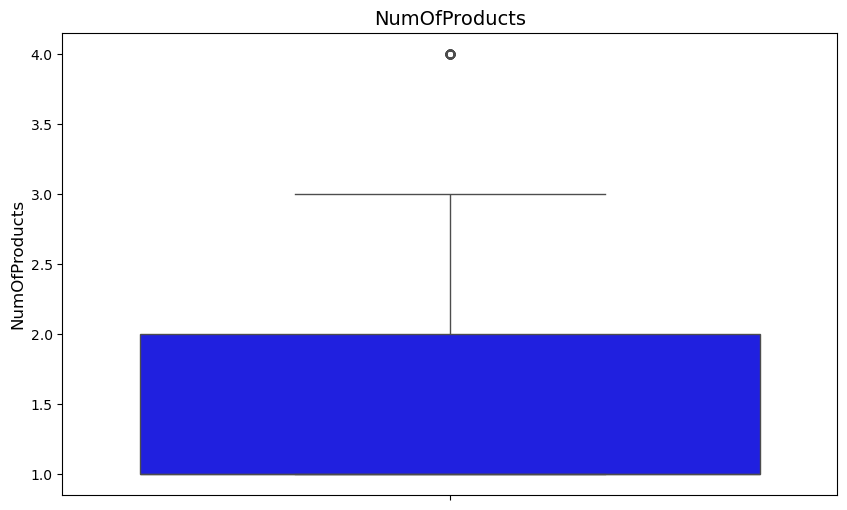

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['NumOfProducts'], color="blue")  # Use 'y' instead of 'x'
plt.title('NumOfProducts', fontsize=14)
plt.ylabel('NumOfProducts', fontsize=12)  # Adjust ylabel instead of xlabel
plt.show()

In [83]:
for col in ['CreditScore', 'Age', 'NumOfProducts']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].apply(lambda x: min(max(x, lower_bound), upper_bound))

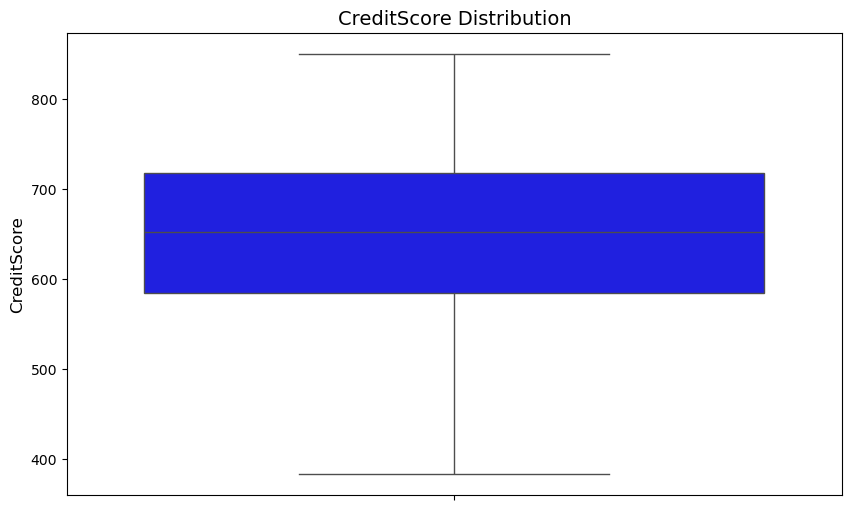

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['CreditScore'], color="blue")  # Use 'y' instead of 'x'
plt.title('CreditScore Distribution', fontsize=14)
plt.ylabel('CreditScore', fontsize=12)  # Adjust ylabel instead of xlabel
plt.show()

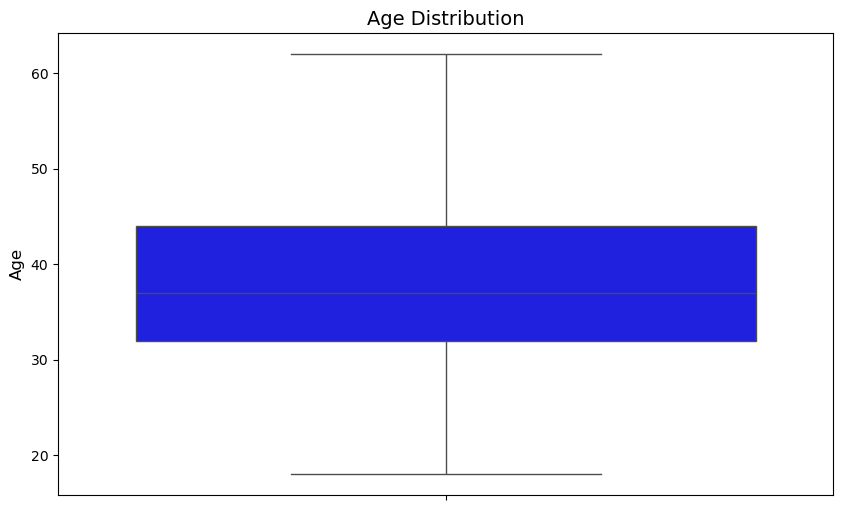

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Age'], color="blue")  # Use 'y' instead of 'x'
plt.title('Age Distribution', fontsize=14)
plt.ylabel('Age', fontsize=12)  # Adjust ylabel instead of xlabel
plt.show()

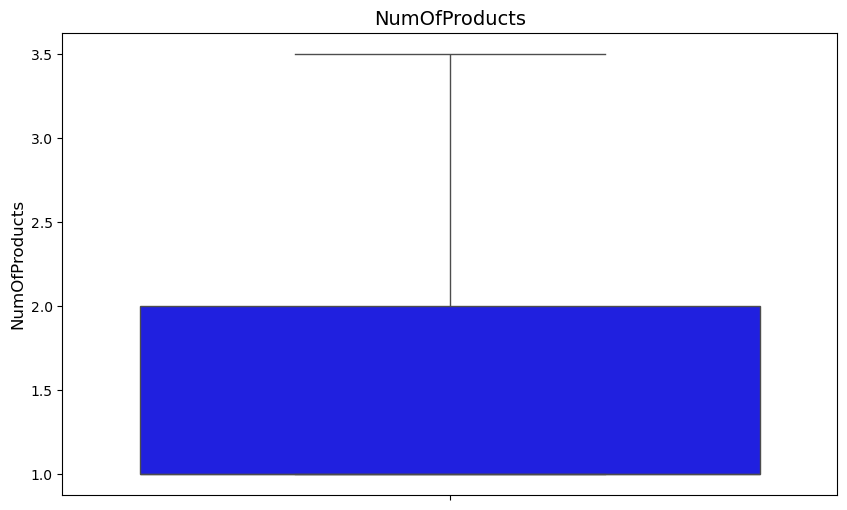

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['NumOfProducts'], color="blue")  # Use 'y' instead of 'x'
plt.title('NumOfProducts', fontsize=14)
plt.ylabel('NumOfProducts', fontsize=12)  # Adjust ylabel instead of xlabel
plt.show()

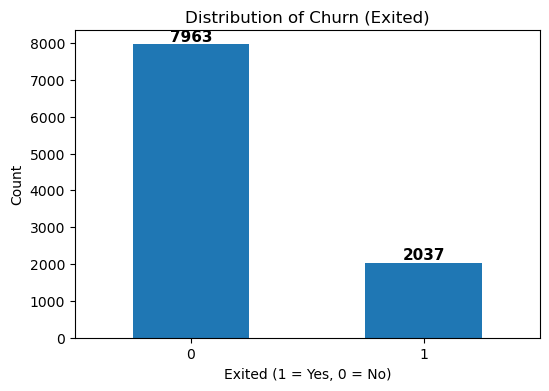

In [87]:
import matplotlib.pyplot as plt

# 1. Distribution of the target variable (Exited)
plt.figure(figsize=(6, 4))
ax = data['Exited'].value_counts().plot(kind='bar')

# Add labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 5,  # Position above the bar
            f'{p.get_height()}',  # The text (count) to display
            ha='center',          # Center the text horizontally
            va='bottom',          # Position the text at the bottom
            fontsize=11,          # Font size
            fontweight='bold')    # Font weight

plt.title('Distribution of Churn (Exited)')
plt.xlabel('Exited (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

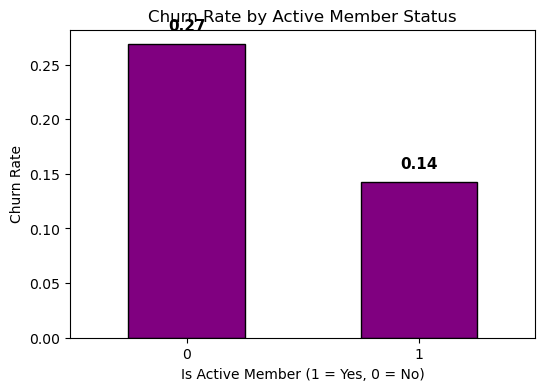

In [88]:
import matplotlib.pyplot as plt

# 2. Churn rate by Active Member status
plt.figure(figsize=(6, 4))
ax = data.groupby('IsActiveMember')['Exited'].mean().plot(kind='bar', color='purple', edgecolor='k')

# Add labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.01,  # Position slightly above the bar
            f'{p.get_height():.2f}',  # Format the churn rate to 2 decimal places
            ha='center',             # Center the text horizontally
            va='bottom',             # Position the text at the bottom
            fontsize=11,             # Font size
            fontweight='bold')       # Font weight

plt.title('Churn Rate by Active Member Status')
plt.xlabel('Is Active Member (1 = Yes, 0 = No)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()


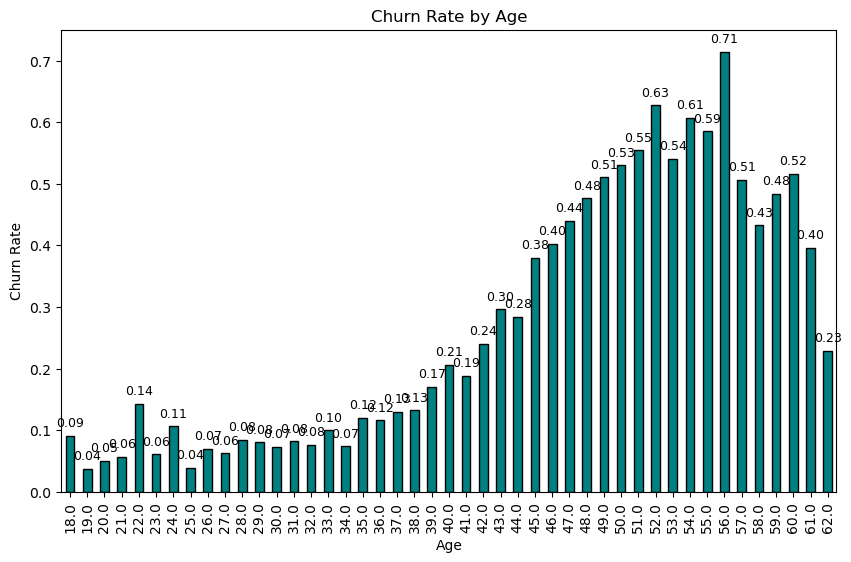

In [89]:
import matplotlib.pyplot as plt

# 3. Churn rate by Age
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = data.groupby('Age')['Exited'].mean().plot(kind='bar', color='teal', edgecolor='k')

# Add labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.01,  # Position slightly above the bar
            f'{p.get_height():.2f}',  # Format the churn rate to 2 decimal places
            ha='center',             # Center the text horizontally
            va='bottom',             # Position the text at the bottom
            fontsize=9)              # Font size for better readability

plt.title('Churn Rate by Age')
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.xticks(rotation=90)  # Rotate age labels for better visibility
fig = plt.gcf()
fig.savefig('C://Users//Lin//Desktop//ALY6020//bc.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


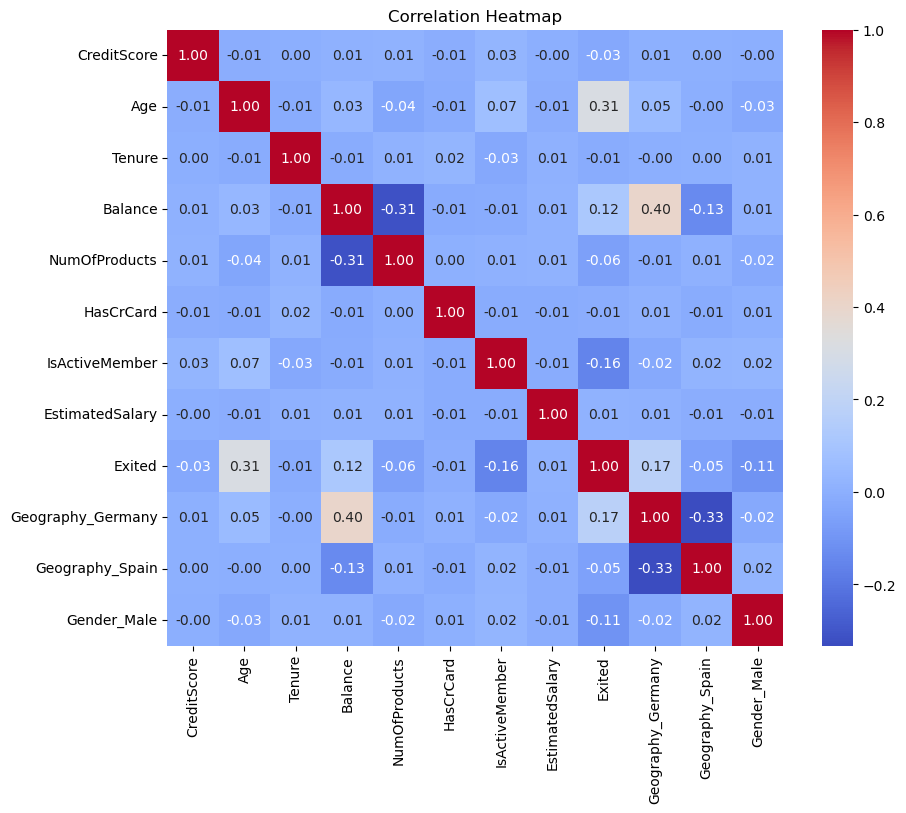

In [90]:
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
fig = plt.gcf()
fig.savefig('C://Users//Lin//Desktop//ALY6020//ch.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
from imblearn.over_sampling import SMOTE
# Extract feature names from the original DataFrame before splitting
feature_names = data.drop('Exited', axis=1).columns.tolist()

# Separate features (pixels) and labels
X = data.drop(columns=['Exited']).values
y = data['Exited'].values


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)




#KNN

In [98]:
Ks=50
mean_acc=np.zeros((Ks-1))

for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train_resampled,y_train_resampled)
    yhat=neigh.predict(X_test_scaled)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

print(mean_acc)

[0.7805 0.799  0.7565 0.7795 0.7465 0.7825 0.743  0.7705 0.7385 0.7605
 0.735  0.7585 0.739  0.7565 0.739  0.7505 0.7365 0.7495 0.7395 0.7495
 0.7355 0.7505 0.74   0.746  0.7395 0.75   0.7385 0.75   0.74   0.755
 0.7445 0.753  0.745  0.7565 0.7485 0.758  0.748  0.7555 0.7495 0.7605
 0.7535 0.759  0.7515 0.758  0.749  0.757  0.7485 0.755  0.749 ]


In [99]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.799 with k= 2


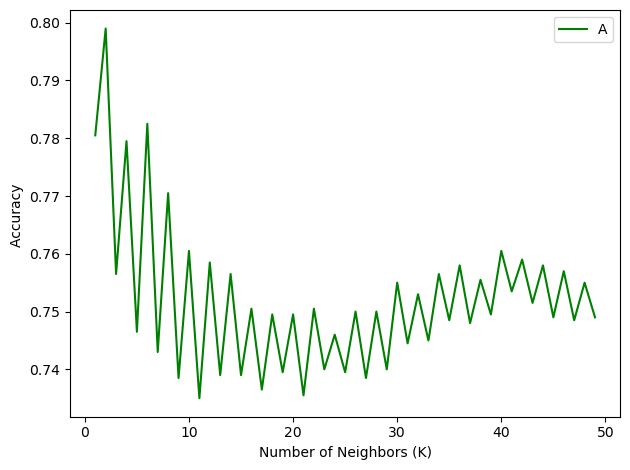

In [100]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [101]:
# Train a KNN classifier with the balanced data
best_k = 2  # Using the previously determined best K value
knn_smote = KNeighborsClassifier(n_neighbors=best_k)
knn_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_smote = knn_smote.predict(X_test_scaled)

# Evaluate the model
classification_report_smote = classification_report(y_test, y_pred_smote)
accuracy_smote = accuracy_score(y_test, y_pred_smote)

# Print the classification report in a readable format
print("Classification Report After SMOTE:")
print(classification_report_smote)

# Print the accuracy
print(f"Accuracy After SMOTE: {accuracy_smote:.2%}")


Classification Report After SMOTE:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1607
           1       0.49      0.49      0.49       393

    accuracy                           0.80      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000

Accuracy After SMOTE: 79.90%


In [102]:
# Calculate training predictions
y_train_pred_resampled = knn_smote.predict(X_train_scaled)

# Calculate training accuracy
training_accuracy_smote = accuracy_score(y_train, y_train_pred_resampled)
print(f"Training Accuracy: {training_accuracy_smote:.2%}")

# Calculate testing accuracy
testing_accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Testing Accuracy: {testing_accuracy_smote:.2%}")

# Compare results
if training_accuracy_smote > testing_accuracy_smote:
    print("The model might be overfitting, as it performs better on training data than on testing data.")
elif training_accuracy_smote < testing_accuracy_smote:
    print("The model might be underfitting, as it performs worse on training data than on testing data.")
else:
    print("The model has balanced performance between training and testing data.")


Training Accuracy: 98.91%
Testing Accuracy: 79.90%
The model might be overfitting, as it performs better on training data than on testing data.


#Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Set up hyperparameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],      # Test both Gini and Entropy criteria
    'max_depth': [3, 5, 10, None],        # Different tree depths
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples in a leaf node
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,                       # 5-fold cross-validation
    scoring='accuracy'          # Optimize for accuracy
)

# Fit the model to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Retrieve the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters from GridSearchCV:")
print(best_params)

# Evaluate the best model
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTuned Model Accuracy: {accuracy:.2%}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters from GridSearchCV:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Tuned Model Accuracy: 78.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1607
           1       0.46      0.55      0.50       393

    accuracy                           0.79      2000
   macro avg       0.67      0.70      0.68      2000
weighted avg       0.80      0.79      0.79      2000



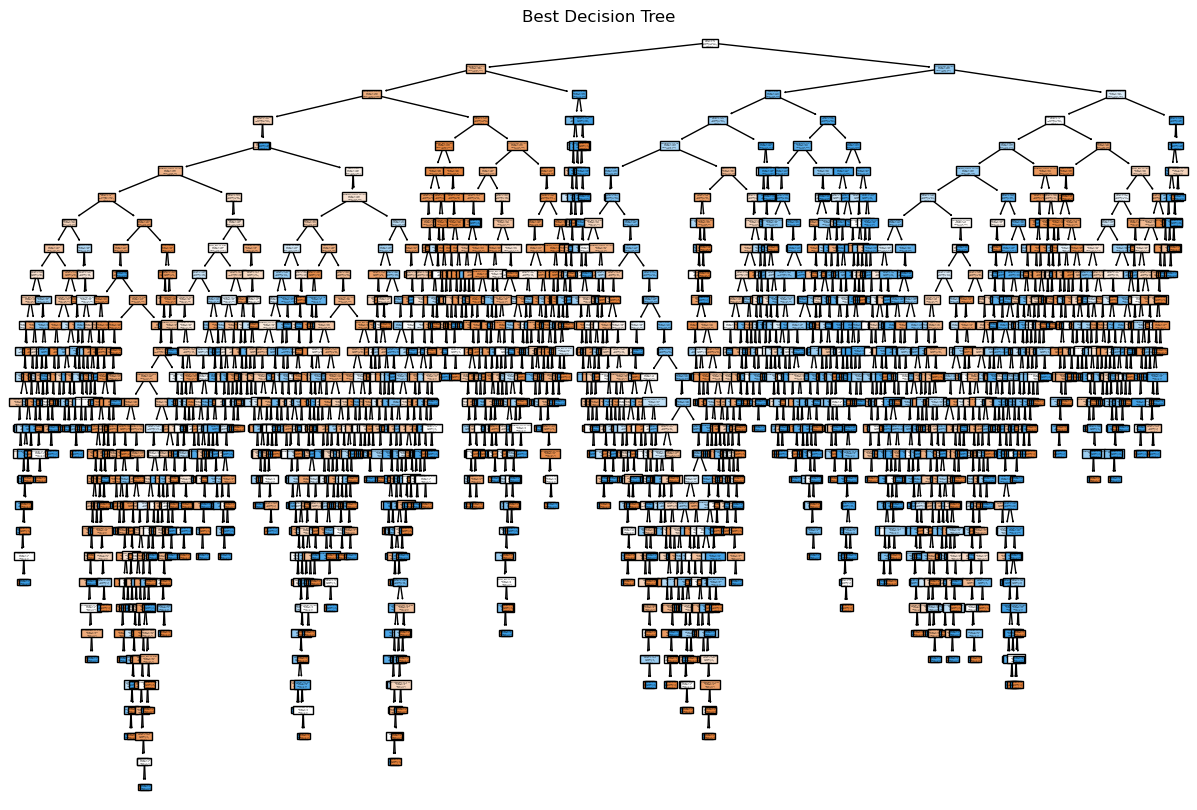

In [105]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Visualize the best decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_model, filled=True, feature_names=feature_names, class_names=['0', '1'])
plt.title("Best Decision Tree")
fig = plt.gcf()
fig.savefig('C://Users//Lin//Desktop//ALY6020//dt.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [106]:

# Text representation of the tuned tree
tree_rules = export_text(best_model, feature_names=list(feature_names))
print("\nTuned Decision Tree Rules:")
print(tree_rules)


Tuned Decision Tree Rules:
|--- Age <= 0.04
|   |--- NumOfProducts <= 0.83
|   |   |--- NumOfProducts <= 0.82
|   |   |   |--- NumOfProducts <= -0.91
|   |   |   |   |--- Age <= -0.47
|   |   |   |   |   |--- Geography_Germany <= 0.57
|   |   |   |   |   |   |--- Balance <= -0.07
|   |   |   |   |   |   |   |--- Balance <= -1.21
|   |   |   |   |   |   |   |   |--- IsActiveMember <= 0.97
|   |   |   |   |   |   |   |   |   |--- Tenure <= 1.05
|   |   |   |   |   |   |   |   |   |   |--- Gender_Male <= -0.09
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- Gender_Male >  -0.09
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- Tenure >  1.05
|   |   |   |   |   |   |   |   |   |   |--- HasCrCard <= -0.45
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- HasCrCard >  -0.45
|   |   |   |   |   |  

In [107]:
# Decision Tree: Training and Testing Scores
dt_train_acc = accuracy_score(y_train_resampled, best_model.predict(X_train_resampled))
dt_test_acc = accuracy_score(y_test, y_pred)

print("\nDecision Tree:")
print(f"Training Accuracy: {dt_train_acc:.4f}")
print(f"Testing Accuracy: {dt_test_acc:.4f}")


Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.7850


# Random Forest


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],  # Number of trees
    'max_depth': [3, 5, 10, 20, None],         # Depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples in a leaf node
    'max_features': ['sqrt', 'log2', None]     # Number of features considered for splitting
}

# Randomized Search for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=rf_param_grid, 
    n_iter=50,               # Number of parameter combinations to try
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',      # Optimize for accuracy
    n_jobs=-1,               # Use all processors for parallel computation
    verbose=1,               # Verbosity level for progress
    random_state=42          # Ensure reproducibility
)

# Fit the RandomizedSearchCV to the training data
rf_random_search.fit(X_train_resampled, y_train_resampled)
rf_best_model = rf_random_search.best_estimator_

# Evaluate Random Forest on the test set
rf_y_pred = rf_best_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Display best parameters and accuracy
print(f"\nBest Parameters (Random Forest): {rf_random_search.best_params_}")
print(f"Accuracy (Random Forest): {rf_accuracy:.2%}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters (Random Forest): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Accuracy (Random Forest): 84.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.60      0.59      0.60       393

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [109]:
# Random Forest: Training and Testing Scores
rf_train_acc = accuracy_score(y_train_resampled, rf_best_model.predict(X_train_resampled))
rf_test_acc = accuracy_score(y_test, rf_y_pred)

print("\nRandom Forest:")
print(f"Training Accuracy: {rf_train_acc:.4f}")
print(f"Testing Accuracy: {rf_test_acc:.4f}")


Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.8425


In [110]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Ensure y_train is 1D
y_train_resampled = y_train_resampled.ravel()

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],        # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],    # Step size shrinkage
    'max_depth': [3, 5, 10, 15],                     # Maximum depth of trees
    'min_samples_split': [2, 5, 10, 20],             # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6]                 # Minimum samples in a leaf node
}

# Randomized Search for Gradient Boosting
gb_random_search = RandomizedSearchCV(
    estimator=gb_model, 
    param_distributions=gb_param_grid, 
    n_iter=50,                      # Number of random parameter combinations
    cv=5,                           # 5-fold cross-validation
    scoring='accuracy',             # Optimize for accuracy
    n_jobs=-1,                      # Use all processors
    verbose=1,                      # Show progress
    random_state=42                 # Ensure reproducibility
)

# Fit RandomizedSearchCV to the training data
gb_random_search.fit(X_train_resampled, y_train_resampled)
gb_best_model = gb_random_search.best_estimator_

# Predict on the test set
gb_y_pred = gb_best_model.predict(X_test_scaled)

# Evaluate model performance
gb_accuracy = accuracy_score(y_test, gb_y_pred)

# Display best parameters and accuracy
print(f"\nBest Parameters (Gradient Boosting): {gb_random_search.best_params_}")
print(f"Accuracy (Gradient Boosting): {gb_accuracy:.2%}")

# Generate and display classification report
print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, gb_y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters (Gradient Boosting): {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_depth': 15, 'learning_rate': 0.05}
Accuracy (Gradient Boosting): 85.20%

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.52      0.58       393

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000



In [111]:
# Gradient Boosting: Training and Testing Scores
gb_train_acc = accuracy_score(y_train_resampled, gb_best_model.predict(X_train_resampled))
gb_test_acc = accuracy_score(y_test, gb_y_pred)

print("\nGradient Boosting:")
print(f"Training Accuracy: {gb_train_acc:.4f}")
print(f"Testing Accuracy: {gb_test_acc:.4f}")


Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.8520


In [112]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a pipeline to scale data and train a linear SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('svm', LinearSVC(random_state=42, max_iter=1000))  # Use LinearSVC
])

# Step 2: Define a parameter grid for C
param_grid = {'svm__C': [0.1, 1, 10]}  # Regularization strength

# Step 3: Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline, 
    param_distributions=param_grid, 
    n_iter=3,               # Number of parameter combinations to try
    cv=3,                   # 3-fold cross-validation
    verbose=1,              # Display progress during execution
    n_jobs=-1,              # Use all available processors
    random_state=42         # Ensure reproducibility
)

# Step 4: Fit the model to the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Step 5: Get the best model
best_svm = random_search.best_estimator_
print("\nBest parameters found: ", random_search.best_params_)

# Step 6: Evaluate the model on the resampled training data
y_train_pred = best_svm.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"\nTraining Accuracy: {train_accuracy:.2%}")

# Step 7: Evaluate the model on the scaled test data
y_test_pred = best_svm.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTesting Accuracy: {test_accuracy:.2%}")

# Step 8: Print classification report for the test set
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Fitting 3 folds for each of 3 candidates, totalling 9 fits

Best parameters found:  {'svm__C': 1}

Training Accuracy: 71.09%

Testing Accuracy: 72.60%

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1607
           1       0.39      0.72      0.51       393

    accuracy                           0.73      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.73      0.75      2000



In [113]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define the SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Step 2: Hyperparameter tuning using RandomizedSearchCV
# Define parameter grid for C and gamma with smaller ranges
param_grid = {
    'C': [1, 10, 100],       # Regularization strength
    'gamma': [0.01, 0.1, 1]  # RBF kernel coefficient
}

# Set up the RandomizedSearchCV with reduced n_iter and cv
random_search = RandomizedSearchCV(
    estimator=svm_rbf, 
    param_distributions=param_grid, 
    n_iter=5,  # Number of parameter combinations to try
    cv=3,      # 3-fold cross-validation
    verbose=1, 
    n_jobs=-1, 
    random_state=42
)

# Step 3: Fit RandomizedSearchCV to the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Step 4: Get the best parameters from the random search
print("\nBest parameters found: ", random_search.best_params_)

# Step 5: Train the best model
best_svm = random_search.best_estimator_

# Step 6: Evaluate the model on training data
y_train_pred = best_svm.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"\nTraining Accuracy: {train_accuracy:.2%}")

# Step 7: Evaluate the model on test data
y_test_pred = best_svm.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTesting Accuracy: {test_accuracy:.2%}")

# Step 8: Print classification report for test set
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best parameters found:  {'gamma': 1, 'C': 10}

Training Accuracy: 99.77%

Testing Accuracy: 78.15%

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1607
           1       0.43      0.34      0.38       393

    accuracy                           0.78      2000
   macro avg       0.64      0.62      0.62      2000
weighted avg       0.76      0.78      0.77      2000



In [114]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define the SVM model with a Polynomial kernel
svm_poly = SVC(kernel='poly', random_state=42)

# Step 2: Define the parameter grid for RandomizedSearchCV
param_dist = {
    'C': [1, 10, 100],        # Regularization parameter
    'degree': [2, 3],         # Degree of the polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'coef0': [0, 0.1]         # Independent term in polynomial kernel
}

# Step 3: Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svm_poly, 
    param_distributions=param_dist, 
    n_iter=5,                # Number of random combinations to try
    cv=3,                    # 3-fold cross-validation
    verbose=1, 
    n_jobs=-1,               # Parallelize over all available CPUs
    random_state=42
)

# Step 4: Fit the RandomizedSearchCV to the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best model
best_params = random_search.best_params_
best_svm = random_search.best_estimator_

print("\nBest Parameters (Polynomial Kernel SVM):", best_params)

# Step 5: Evaluate the model on the resampled training data
y_train_pred = best_svm.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"\nTraining Accuracy: {train_accuracy:.2%}")

# Step 6: Evaluate the model on the scaled testing data
y_test_pred = best_svm.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTesting Accuracy: {test_accuracy:.2%}")

# Step 7: Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Parameters (Polynomial Kernel SVM): {'gamma': 'scale', 'degree': 3, 'coef0': 0, 'C': 100}

Training Accuracy: 81.56%

Testing Accuracy: 78.30%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1607
           1       0.47      0.75      0.58       393

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.84      0.78      0.80      2000



In [115]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform

# Define the parameter distribution
param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', "identity", "logistic"],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': uniform(0.001, 0.01),  # Random values in the range [0.001, 0.01]
    'max_iter': [200, 300]
}

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Perform random search
random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=3,
    random_state=42,
    n_jobs=-1
)

# Fit the random search to the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the resampled training data
y_train_pred = best_model.predict(X_train_resampled)
training_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"\nTraining Accuracy: {training_accuracy:.2%}")

# Evaluate the best model on the scaled test set
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTesting Accuracy: {test_accuracy:.2%}")

# Generate classification report for the test set
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Compare training and testing accuracies
if training_accuracy > test_accuracy:
    print("The model might be overfitting, as it performs better on training data than on testing data.")
elif training_accuracy < test_accuracy:
    print("The model might be underfitting, as it performs worse on training data than on testing data.")
else:
    print("The model has balanced performance between training and testing data.")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.004567533266935893, 'max_iter': 300, 'solver': 'adam'}

Training Accuracy: 97.98%

Testing Accuracy: 77.50%

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1607
           1       0.44      0.54      0.49       393

    accuracy                           0.78      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.80      0.78      0.78      2000

The model might be overfitting, as it performs better on training data than on testing data.
